# M√©todo de Newton na pr√°tica e suas rela√ß√µes com fractais

### Prof. Pedro Peixoto <ppeixoto@usp.br>

Mar 2024



In [ ]:
# Biblioteca de "algebra linear computacional"
import numpy as np

#Acesso a ferramentas de sistema
import sys

#Pacotes para gr√°ficos
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


## Qual a inten√ß√£o desse notebook e dessa atividade?

Nesse notebook vamos revisar alguns conceitos de m√©todos para achar zero de fun√ß√µes e da√≠ explorar casos interessantes de fun√ß√µes complexas e suas rela√ß√µes com fractais.

# M√©todo de Newton na reta real

Definindo uma fun√ß√£o e sua derivada

In [ ]:
# Usamos aqui fun√ß√µes "lambda" de Python, que s√£o atalhos r√°pidos para defini√ß√£o de fun√ß√µes
f = lambda x: x**2-2
df = lambda x: 2*x
d2f = lambda x: 2*(x/x)   #Forma de escrever 1 (x/x) que vale tanto para escalares quanto vetores

root_exact = np.sqrt(2)
#Voc√™ poderia de forma an√°loga definir algo com:
#def f(x):
#    return x**2 - 2
#
#def df(x):
#    return 2*x

Plotando a fun√ß√£o

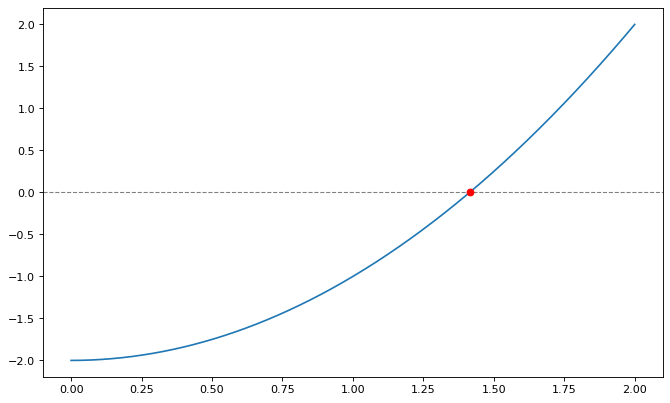

In [ ]:
# Quais pontos quero plotar?
x = np.linspace(0, 2, 1000)

#O painel para o gr√°fico
fig = plt.figure(figsize=(10, 6), dpi=80)

# Plotar uma linha no zero como refer√™ncia
plt.axhline(y=0.0, color='grey', lw='1', linestyle='--')

#A fun√ß√£o
plt.plot(x, f(x))


#A raiz exata
plt.plot(root_exact, f(root_exact), 'ro')

plt.show()

Podemos esperar converg√™ncia do m√©todo nesse caso? Para qualquer chute inicial?

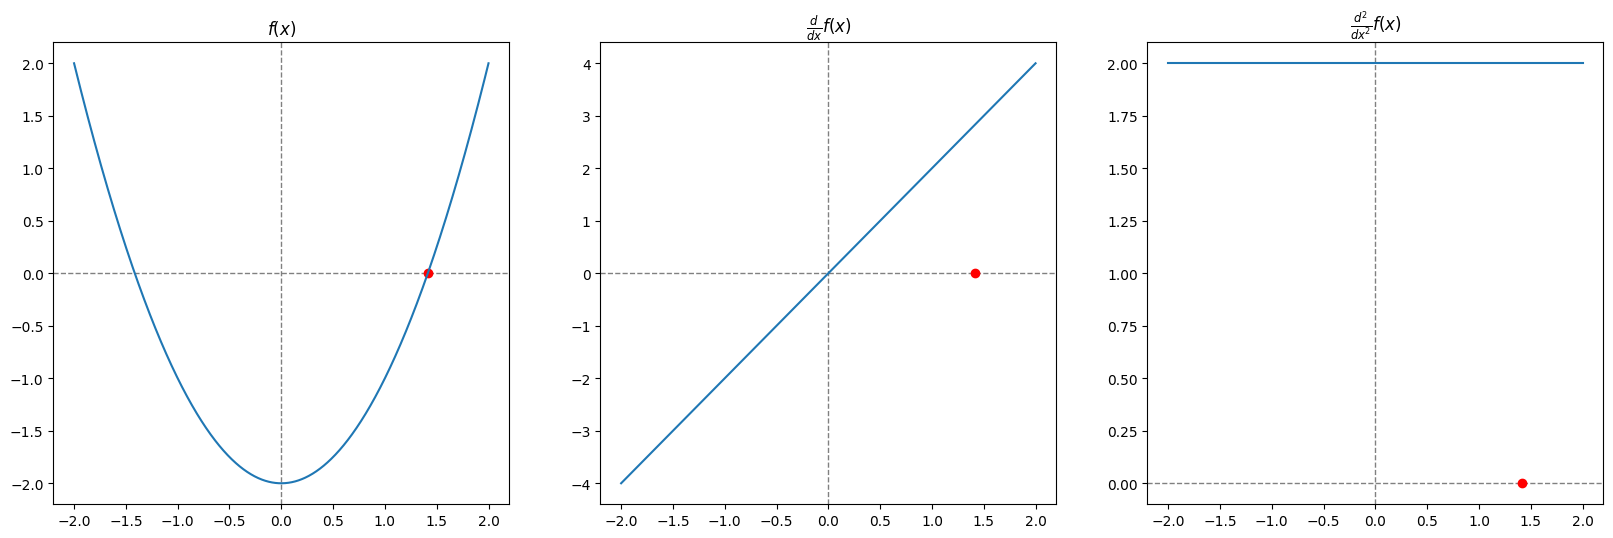

In [ ]:
# Condi√ß√µes do teorema da convexidade
#----------------------------------------

x = np.linspace(-2, 2, 1000)

# Criando uma figura com 3 subfiguras
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
plt.subplots_adjust(hspace=0.4)

# Exibindo eixos auxiliares e a raiz exata para todas as subfiguras
for ax in [ax1, ax2, ax3]:
  ax.axhline(y=0.0, color='grey', lw='1', linestyle='--')
  ax.axvline(x=0.0, color='grey', lw='1', linestyle='--')
  ax.plot(root_exact, f(root_exact), 'ro')

# A fun√ß√£o
ax1.plot(x, f(x))
ax1.set_title(r'$f(x)$')

# A derivada primeira
ax2.plot(x, df(x))
ax2.set_title(r'$\frac{d}{dx}f(x)$')

# A derivada segunda
ax3.plot(x, d2f(x))
ax3.set_title(r'$\frac{d^2}{dx^2}f(x)$')

plt.show()

Qual intervalo podemos usar?

## Uma implementa√ß√£o

Dado $x_0$, calculo:

$$ x_{i+1} = x_{i} - f(x_i)/f'(x_i) $$

In [ ]:
# M√©todo de Newton, com par√¢metros:
# f   : fun√ß√£o
# df  : derivada da fun√ß√£o
# x0  : chute inicial
# n   : n√∫mero de itera√ß√µes m√°ximo
# tol  : limitar para crit√©rio de parada

def newton(f, df, x0, n = 100000, tol=10e-350):

  x = np.zeros(n+1) # o vetor √© um pouco maior que preciso...
  #x = np.zeros(n+2, dtype=np.complex64) #vou permitir numeros complexos!
  x[0] = x0

  #Iteradas
  for i in range(n):

    # Se a derivada for muito perto de zero,... sem chances de continuar
    if np.abs(df(x[i])) < 10e-200:
      print("Derivada muito perto de zero...parando em", i, "itera√ß√µes!")
      return x[:i+1] # Isso faz com o vetor devolvido v√° at√© "i", incluso.

    #Aqui esta o m√©todo
    x[i+1] = x[i] - f(x[i])/df(x[i])

    # Crit√©rios de parada
    if np.abs(x[i+1]-x[i]) < tol: #Diferen√ßa em x pequena
        print("Parando pois varia√ß√£o entre iteradas est√° muito pequena!", i, "itera√ß√µes!")
        return x[:i+2] #Devolvo at√© o elemento "i+1", incluso, pois este j√° foi computado

    if np.abs(f(x[i+1])) < tol: # f pequeno
        print("Parando pois a f est√° ficando muito pequena!", i, "itera√ß√µes!")
        return x[:i+2] #Devolvo at√© o elemento "i+1", incluso, pois este j√° foi computado

  print("Numero m√°ximo de itera√ß√µes atingido!", n)
  return x

Vamos testar e ilustrar o funcionamento...

Numero m√°ximo de itera√ß√µes atingido! 2
[2.         1.5        1.41666667]


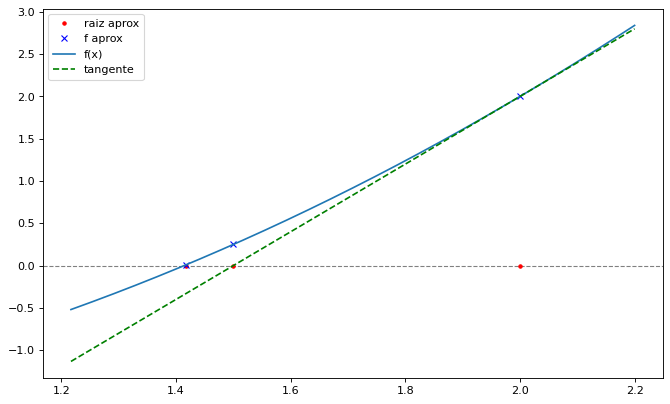

Raiz approx: 1.4166666666666667  exata:  1.4142135623730951
Erro       : 0.002453104293571595


In [ ]:
# Chamando nosso m√©todo
root = newton(f, df, x0=2, n = 2)  #2 passos apenas
print(root) # as iteradas at√© a ra√≠z

#Figura
fig = plt.figure(figsize=(10, 6), dpi=80)

# Plotar uma linha no zero como refer√™ncia
plt.axhline(y=0.0, color='grey', lw='1', linestyle='--')

# As aproxima√ß√µes do "zero"
plt.plot(root, np.zeros_like(root), 'r.', label="raiz aprox")

#O valor da f nas aproxima√ß√µes
plt.plot(root, f(root), 'bx', label="f aprox")

# A fun√ß√£o original
x = np.linspace(np.min(root)-0.2, np.max(root)+0.2, 1000)
plt.plot(x, f(x), label="f(x)")

# Linha tangente no ponto do chute inicial
plt.plot(x, df(root[0])*(x-root[0])+f(root[0]), 'g--', label="tangente")
plt.legend(loc="upper left")
plt.show()

print("Raiz approx:", root[-1], " exata: ", root_exact) #ultimo valor do vetor
print("Erro       :", root[-1] - root_exact) #ultimo valor do vetor

Agora vamos testar para valer!





Numero m√°ximo de itera√ß√µes atingido! 11
[100.          50.01        25.024996    12.55245805   6.35589469
   3.33528161   1.96746556   1.49200089   1.41624133   1.41421501
   1.41421356   1.41421356]


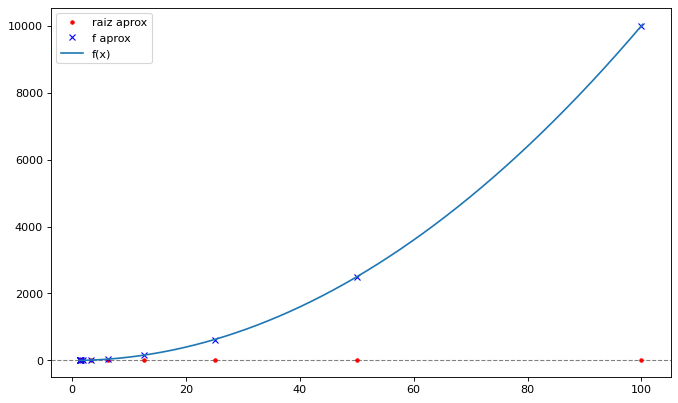

Raiz approx: 1.4142135623730951  exata:  1.4142135623730951
Erro       : 0.0


In [ ]:
# Nosso m√©todo
root = newton(f, df, x0=100, n=11)
print(root) # lista de ra√≠zes aproximadas

#Figura
fig = plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(y=0.0, color='grey', lw='1', linestyle='--')
plt.plot(root, np.zeros_like(root), 'r.', label="raiz aprox")
plt.plot(root, f(root), 'bx', label="f aprox")
x = np.linspace(np.min(root)-0.2, np.max(root)+0.2, 1000)
plt.plot(x, f(x), label="f(x)")
plt.legend(loc="upper left")
plt.show()

print("Raiz approx:", root[-1], " exata: ", root_exact) #ultimo valor do vetor
print("Erro       :", root[-1] - root_exact) #ultimo valor do vetor

Mas e a fun√ß√£o que tem no scipy?
scipy.optimize.newton
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html

In [ ]:
# Importar o Scipy
from scipy import optimize

root, r = optimize.newton(f, 100, df, full_output=True)
print(r)
print()
print("Raiz approx:", root, " exata:", root_exact) #ultimo valor do vetor
print("Erro       :", root - root_exact) #ultimo valor do vetor

      converged: True
           flag: converged
 function_calls: 22
     iterations: 11
           root: 1.4142135623730951

Raiz approx: 1.4142135623730951  exata: 1.4142135623730951
Erro       : 0.0


## ‚ùó Atividade ‚ùó

Teste o m√©todo de Newton que implementamos para achar a raiz do seguinte polin√¥mio partindo sempre de $x_0=100$:

$$ f(x) = (x - 1)^{3 n}, $$

onde $n$ √© o √∫ltimo d√≠gito n√£o nulo do seu n√∫mero USP.

Quantas itera√ß√µes foram necess√°rias para garantir um erro menor que $10^{-5}$?

Ser√° que o n√∫mero de itera√ß√µes varia conforme o $n$?


In [ ]:
# C√≥digo da resposta aqui
# Nosso m√©todo
root = newton(f, df, x0=100, n=11)
print(root) # lista de ra√≠zes aproximadas

#Figura
fig = plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(y=0.0, color='grey', lw='1', linestyle='--')
plt.plot(root, np.zeros_like(root), 'r.', label="raiz aprox")
plt.plot(root, f(root), 'bx', label="f aprox")
x = np.linspace(np.min(root)-0.2, np.max(root)+0.2, 1000)
plt.plot(x, f(x), label="f(x)")
plt.legend(loc="upper left")
plt.show()

print("Raiz approx:", root[-1], " exata: ", root_exact) #ultimo valor do vetor
print("Erro       :", root[-1] - root_exact) #ultimo valor do vetor


Coment√°rios da resposta aqui (n√∫mero de itera√ß√µes e observa√ß√µes):

##Casos problem√°ticos

**Caso 1:** Multiplicidade da raiz

$$f(x) = x^p$$


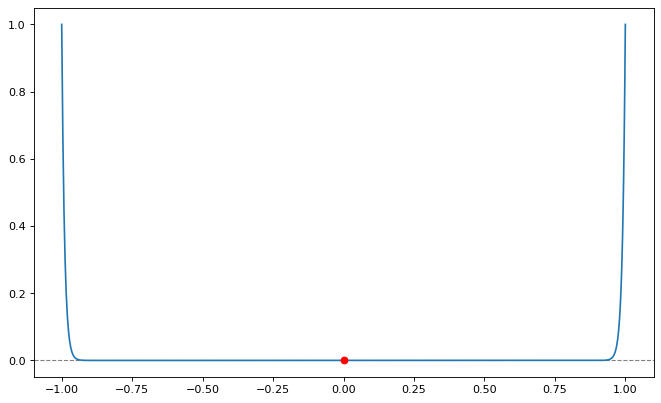

In [ ]:
p = 100
f = lambda x: x**p
df = lambda x: p*x**(p-1)

root_exact = 0.0

fig = plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(y=0.0, color='grey', lw='1', linestyle='--')
x = np.linspace(-1, 1, 1000)
plt.plot(x, f(x))
plt.plot(root_exact, f(root_exact), 'ro')
plt.show()

In [ ]:
#Nosso newton

root = newton(f, df, x0=1, tol=10e-13)
print(root)

fig = plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(y=0, color='grey', lw='1', linestyle='--')
plt.plot(root, np.zeros_like(root), 'r.')
x = np.linspace(0, 1, 1000)
plt.plot(x, f(x))
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

print("Raiz approx:", root[-1], " exata: ", root_exact) #ultimo valor do vetor
print("Erro       :", root[-1] - root_exact) #ultimo valor do vetor

O valor da f j√° √© menor do que 10e-13!!!! Mas estamos longe da raiz ainda...

Derivada muito perto de zero...parando em 466 itera√ß√µes!
[1.         0.99       0.9801     0.970299   0.96059601 0.95099005
 0.94148015 0.93206535 0.92274469 0.91351725 0.90438208 0.89533825
 0.88638487 0.87752102 0.86874581 0.86005835 0.85145777 0.84294319
 0.83451376 0.82616862 0.81790694 0.80972787 0.80163059 0.79361428
 0.78567814 0.77782136 0.77004315 0.76234271 0.75471929 0.74717209
 0.73970037 0.73230337 0.72498034 0.71773053 0.71055323 0.70344769
 0.69641322 0.68944909 0.6825546  0.67572905 0.66897176 0.66228204
 0.65565922 0.64910263 0.6426116  0.63618549 0.62982363 0.62352539
 0.61729014 0.61111724 0.60500607 0.59895601 0.59296645 0.58703678
 0.58116641 0.57535475 0.5696012  0.56390519 0.55826614 0.55268348
 0.54715664 0.54168508 0.53626823 0.53090554 0.52559649 0.52034052
 0.51513712 0.50998575 0.50488589 0.49983703 0.49483866 0.48989027
 0.48499137 0.48014146 0.47534004 0.47058664 0.46588078 0.46122197
 0.45660975 0.45204365 0.44752321 0.44304798 0.4386175  0.43423133
 0.

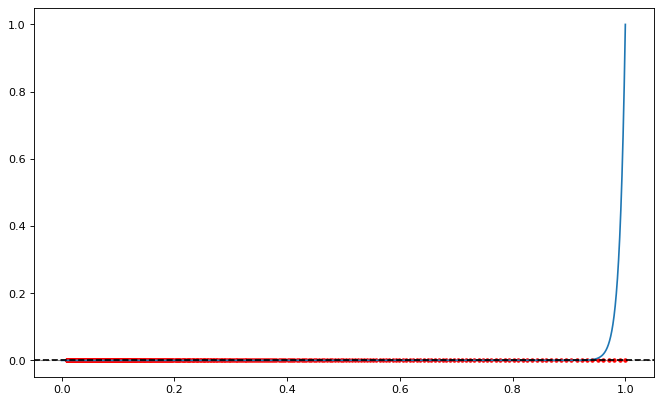

Raiz approx: 0.009246996270269201  exata:  0.0
Erro       : 0.009246996270269201


In [ ]:
#Nosso newton - Agora for√ßando outros crit√©rios de parada
root = newton(f, df, x0=1, tol=10e-300)
print(root)

fig = plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(y=0, color='grey', lw='1', linestyle='--')
plt.plot(root, np.zeros_like(root), 'r.')
x = np.linspace(0, 1, 1000)
plt.plot(x, f(x))
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

print("Raiz approx:", root[-1], " exata: ", root_exact) #ultimo valor do vetor
print("Erro       :", root[-1] - root_exact) #ultimo valor do vetor

Qual o problema? **O m√©todo funciona, mas n√£o tem converg√™ncia quadr√°tica**

Qual a ordem de converg√™ncia nesse caso?

**Caso 2:** √ìrbita peri√≥dica

$$ f(x) = x-x^3, \quad x \in [-0.5, 0.5] $$

In [ ]:
# Ex periodico
f = lambda x : x-x*x*x
df = lambda x: 1- 3*x*x
#f = lambda x : np.sqrt(np.abs(x))*(2*np.heaviside(x,0)-1)
#df = lambda x: (1/2)/np.sqrt(np.abs(x))

root_exact = 0.0

#Nosso newton
x0 = 1/np.sqrt(5)
root = newton(f, df, x0=x0, n=10)
print(root)

fig = plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(y=0, color='grey', lw='1', linestyle='--')
x = np.linspace(-1, 1, 1000)
plt.plot(x, f(x))
plt.axhline(y=0, color='k',linestyle='--')
plt.plot(root, np.zeros_like(root), 'ro')
plt.plot(root, f(root), 'bx')
i=0
plt.plot(x, df(root[i])*(x-root[i])+f(root[i]), 'g--', label="tangente")
i=1
plt.plot(x, df(root[i])*(x-root[i])+f(root[i]), 'g--', label="tangente")
plt.show()

print("Raiz approx:", root[-1], " exata: ", root_exact) #ultimo valor do vetor
print("Erro       :", root[-1] - root_exact) #ultimo valor do vetor






---



### Converg√™ncia

Uma sequ√™ncia $\{x_{n}\}_n$ convergente para $\bar{x}$ √© convergente de ordem $\alpha \ge 1$ se,
$$\lim_{n \to \infty} \frac{|x_{n+1}-\bar{x}|}{|x_n-\bar{x}|^{\alpha}} = \lambda \in \mathbb{R}.$$

$\alpha$ √© chamado de **ordem de converg√™ncia da sequ√™ncia**.

√â poss√≠vel mostrar que se a sequ√™ncia converge com ordem $\alpha$ para o valor $\bar{x}$, ent√£o
$$\lim_{n \to \infty} \frac{|x_{n+1}-\bar{x}|}{|x_n-\bar{x}|^{\alpha}} = \lim_{n \to \infty} \frac{|x_{n+1}-x_n|}{|x_n-x_{n-1}|^{\alpha}}.$$

√â poss√≠vel estimar a ordem de converg√™ncia de um m√©todo com base nas suas itera√ß√µes. Vejamos. Para $n$ suficientemente grande
$$
\frac{|x_{n+1}-x_n|}{|x_n-x_{n-1}|^{\alpha}} \approx \lambda .
$$
Mas observe que tamb√©m vale para $n-1$,
$$
\frac{|x_{n}-x_{n-1}|}{|x_{n-1}-x_{n-2}|^{\alpha}} \approx \lambda,
$$
logo podemos escrever que
$$
\frac{|x_{n}-x_{n-1}|}{|x_{n-1}-x_{n-2}|^{\alpha}} \approx \frac{|x_{n+1}-x_n|}{|x_n-x_{n-1}|^{\alpha}}
$$

de onde podemos tirar que
$$
\left(\frac{|x_n-x_{n-1}|}{|x_{n-1}-x_{n-2}|}\right)^{\alpha} \approx \frac{|x_{n+1}-x_n|}{|x_{n}-x_{n-1}|}
$$
e portanto
$$
\alpha \approx \frac  { \ln \left(\frac{|x_{n+1}-x_n|}{|x_{n}-x_{n-1}|}\right)}{\ln \left(\frac{|x_n-x_{n-1}|}{|x_{n-1}-x_{n-2}|}\right)}
$$

Ou seja, para calcular a ordem de converg√™ncia, basta usarmos informa√ß√µes de 4 iteradas da sequ√™ncia, $x_{n-2},x_{n-1}, x_n, x_{n+1}$, para algum $n$ suficientemente grande.

In [ ]:
#Recebe um vetor com as estimativas e retorna diversas estimativas de ordem
def ordem(x, eps=10e-8):
  n = x.size #tamanho do vetor
  if x.size < 4:
    print("erro, poucos elementos")
    return 0

  #Vamos calcular a ordem para cada conjunto de 4 elementos da sequencia
  alpha_list = []
  for m in range(4, n):

    #Vamos evitar dividir por zero, ent√£o se as iteradas j√° mudam muito pouco, pare
    if np.abs(x[m-1]-x[m-2]) < eps:
      print("Ordem calculada com base na raz√£o final: ", alpha_list[-1])
      return alpha_list

    #Calculo alpha com base nos elementos m, m-1, m-2, m-3
    alpha=np.log(np.abs((x[m]-x[m-1])/(x[m-1]-x[m-2])))/np.log(np.abs((x[m-1]-x[m-2])/(x[m-2]-x[m-3])))

    #Adiciono alpha na lista de alphas calculados
    alpha_list.append(alpha)

  print("Ordem aproximada calculada com base na raz√£o final: ", alpha_list[-1])
  return alpha_list

Vejamos um exemplo de c√°lculo de ordem com a fun√ß√£o:

$$ f(x) = x^p -2$$

com $p=4$ partindo de $x_0=1$.

In [ ]:
#Exemplo
p = 4
f = lambda x : x**p-2
df = lambda x: p*x**(p-1)

root = newton(f, df, x0=1, tol=10e-300)
print(root)

#Calcula da ordem
ord = ordem(root)
print(ord)



---



## ‚ùó Atividade ‚ùó

Estime a ordem de converg√™ncia ($\alpha$) do m√©todo de Newton implementado com base na estimativa acima para os exemplos:

 1. $f(x) = x^p-2$ com $p=3$ e $x_0=10$

 2. $f(x) = (x-2)^p,$ com $p=4$ e $x_0=10$

 3. $f(x) = x^3 + x^2 + 2x/9$  e $x_0=0.2$
  
 **Dica:** Comece fazendo um gr√°fico da fun√ß√£o!

**Cuidado!** Quando h√° mais de uma raiz, a ordem de converg√™ncia pode ser diferente para cada raiz. Teste isso na fun√ß√£o (3) mudando o $x_0$.

Comente, para cada teste e cada raiz da fun√ß√£o, se a converg√™ncia √©

*   Linear ($\alpha \approx 1$)
*   Quadr√°tica ($\alpha \approx 2$)
*   C√∫bica ($\alpha \approx 3$)

Comente, tamb√©m, o que acontece se aumentar o $p$ nos casos (1) e (2)?

**Cuidado!** A fun√ß√£o que calcula ordem devolve um vetor com v√°rias estimativas de ordens, analise esse vetor para decidir a ordem do m√©todo. Note que ordem correta √© algo assint√≥tico, ou seja, com $n$ muito grande, mas se o $n$ for muito grande, j√° estamos muito perto da raiz e da precis√£o de m√°quina.



In [ ]:
#Coloque aqui o seu c√≥digo de respostas
# Fun√ß√£o 1

#Resultados fun√ß√£o 1

# Fun√ß√£o 2

#Resultados fun√ß√£o 2

# Fun√ß√£o 3

#Resultados fun√ß√£o 3

Coloque aqui observa√ß√µes sobre o exerc√≠cio:



*   Fun√ß√£o 1


*   Fun√ß√£o 2


*   Fun√ß√£o 3





---



## Bacia de atra√ß√£o

Dado um chute inicial, para que zero ele converge quando temos v√°rios zeros na fun√ß√£o?

In [ ]:
f = lambda x: x*(x-2)**2*(x+1)
df = lambda x: 4 - 9* x**2 + 4 *x**3

#Para cada ra√≠z exata, vamos dar uma cor.
roots_exact = np.array([0.0, 2.0, -1.0])
colors = [ 'b.', 'r.', 'g.'] #, 'y', 'm', 'k',]

fig = plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(y=0.0, color='grey', lw='1', linestyle='--')
x = np.linspace(-1.2, 2.2, 100)
plt.plot(x, f(x))

# Para cada chute inicial, ver para qual ra√≠z converge, e pinta da cor da ra√≠z
for xi in x:
  ri = optimize.newton(f, xi, df) #Para onde convergiu?
  color = 'k.'
  for i, root in enumerate(roots_exact): #Acho a cor da ra√≠z correspondente
    if np.abs(root-ri) < 0.01:
      color = colors[i]
  plt.plot(xi, 0.0 , color, marker="+")

#Plot das ra√≠zes
for i, root in enumerate(roots_exact):
    plt.plot(root, f(root), colors[i], marker="o")

plt.show()

# M√©todo de Newton para complexos

Dado $z_0 \in \mathbb{C}$:

$$z_{i+1}=z_{i}-f(z)/f'(z) $$

O c√≥digo √© o mesmo de antes, s√≥ mudamos o tipo da vari√°vel "x"

In [ ]:
# M√©todo de Newton, com par√¢metros:
# f   : fun√ß√£o
# df  : derivada da fun√ß√£o
# x0  : chute inicial
# n   : n√∫mero de itera√ß√µes m√°ximo
# tol  : limitar para crit√©rio de parada
# stop : tipo de crit√©rio de parada ("f" default, "x")

def newton(f, df, x0, n=1000, tol=10e-5, stop="f"):

  #x = np.zeros(n+2) # o vetor √© um pouco maior que preciso...
  x = np.zeros(n+2, dtype=np.complex64) #vou permitir numeros complexos!
  x[0] = x0

  #Iteradas
  for i in range(n):

    # Se a derivada for muito perto de zero,... sem chances de continuar
    if np.abs(df(x[i])) < 10e-20:
      print("derivada muito perto de zero...parando em", i, "itera√ß√µes!")
      return x[:i+1]

    #Aqui esta o m√©todo
    x[i+1] = x[i] - f(x[i])/df(x[i])

    # Crit√©rios de parada
    if stop == "x": #Diferen√ßa em x pequena
      if np.abs(x[i+1]-x[i]) < tol:
        return x[:i+2]

    else: #stop == "f" # default # f pequeno
      if np.abs(f(x[i+1])) < tol:
        return x[:i+2]

  return x[:i+1]

In [ ]:
#Nossa fun√ß√£o de interesse
f = lambda z: z**3 - 1
df = lambda z: 3*z**2

#f = lambda z: z**4 - 1
#df = lambda z: 4*z**3


In [ ]:
# Vamos chamar o nosso Newton!
z0 = -1-0.5j
root = newton(f, df, x0=z0, n=115)

# Plot das raizes
fig = plt.figure(figsize=(10, 6), dpi=80)
plt.plot(root.real, root.imag, 'o')
for i, r in enumerate(root):
    print(r)
    plt.annotate(str(i), (root.real[i], root.imag[i]), fontsize=14)

plt.ylabel('Imag')
plt.xlabel('Real')
print()

##Fractais : A bacia de atra√ß√£o complexa

In [ ]:
# Dominio [-a,a] x [-i*a,i*a]
a = 2

# Discretiza√ß√£o do dom√≠nio em 2000 pontos
d = 1001j #numero de pontos entre -a e a (inclusive)

#Malha de reais em R2
x, y = np.ogrid[-a:a:d,-a:a:d] #Vetores

# Malha de complexos
z0 = x + 1j*y

print(z0.shape)
print(z0[:10,:10])

In [ ]:
#Itera√ß√µes de Newton em conjunto para todos os chutes iniciais!
niter = 200
eps = 1.e-16
np.seterr(divide='ignore', invalid='ignore')

z = z0
for i in range(niter):
    dftmp = df(z)
    dftmp[ np.abs(dftmp) < eps ] = np.nan
    z -= f(z)/dftmp




In [ ]:
#Saiu do domn√≠nio?
z[ np.isnan(z) ] = 0.0 + 0j
z[ np.abs(z.real) > a-eps] = 0.0 + 0j
z[ np.abs(z.imag) > a-eps] = 0.0 + 0j
#print(np.angle(z))

#Ra√≠zes que achei
unique_roots = np.unique(z.round(decimals=2))
unique_roots = np.delete(unique_roots,(unique_roots==0j).argmax())
root_list = []
print("Ra√≠zes que achei (aproximadas):")
for root in unique_roots:
    root_list.append((root.real, root.imag))
    print(root)

nroots = len(unique_roots)


In [ ]:
#Transformar os valores das ra√≠zes imagin√°rias em cores!
zcol= np.zeros_like(z, dtype=np.int64)
tol=0.01
for i, root in enumerate(unique_roots):
    zcol[np.abs(z-root)<tol] = i

#Inverte eixos para plots
zcol = zcol.swapaxes(0,1)

# inverte ordem do eixo y (plotar de baixo para cima)
#zcol = zcol[:, ::-1]


# Cores das ra√≠zes
colors = [ 'g', 'b', 'r', 'y', 'm', 'k',]
cmap = ListedColormap(colors[:nroots])

print(zcol)

In [ ]:
#Plot figure

plt.figure(figsize=(16,16))
plt.imshow(zcol, cmap=cmap, extent=[-a, a, -a, a])
for x,y in root_list:
    print("Roots:", x,y)
    plt.scatter(x, y, s=50, c='black', marker='o')



Aumente a resolu√ß√£o para ver mais detalhes!



---

## üß© Atividade opcional üß©

Tente fazer com que a cor seja proporcional ao n√∫mero de itera√ß√µes. Assim, os pontos que convergem mais r√°pido ficam mais pertos de branco (pinte a ra√≠z de branco tamb√©m), e os chutes iniciais que usam muitas itera√ß√µes ter√£o a cor forte da respectiva ra√≠z.

Exemplo do Wikipedia: https://en.wikipedia.org/wiki/Newton_fractal


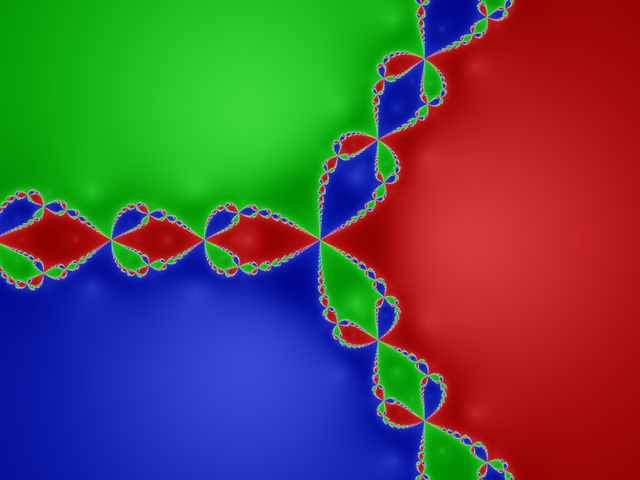

In [ ]:
# C√≥digos: